# SOM applied to RGB data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The dataset consists of $N=3000$ points of type RGB, i.e., three number tuples in the range $[0,255]$ each.

The funcion `imshow` from the package `pyplot` can represent each point as a colour pixel. 

For example:

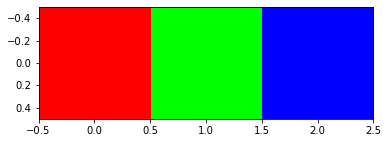

In [2]:
a = (255,0,0)
b = (0,255,0)
c = (0,0,255)
plt.imshow(np.array([a,b,c]).reshape(1,3,3))

Generation of the dataset

In [3]:
N = 3000
train_data = np.random.randint(0, 255, (N, 3))
train_data.shape,train_data[0]


((3000, 3), array([ 17,  55, 224]))

## Histograms of each channel

[]

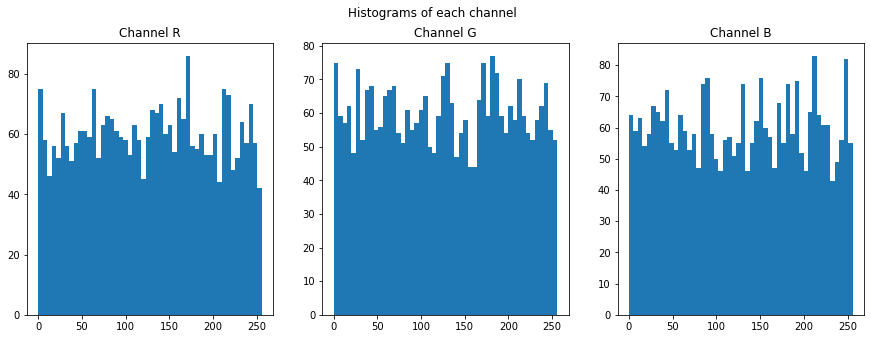

In [4]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
bins = 50
ax[0].hist(train_data[:][:,0],bins=bins,range=(0,256))
ax[0].set_title('Channel R')
ax[1].hist(train_data[:][:,1],bins=bins,range=(0,256))
ax[1].set_title('Channel G')
ax[2].hist(train_data[:][:,2],bins=bins,range=(0,256))
ax[2].set_title('Channel B')
f.suptitle('Histograms of each channel')
plt.plot()

Plot of dataset

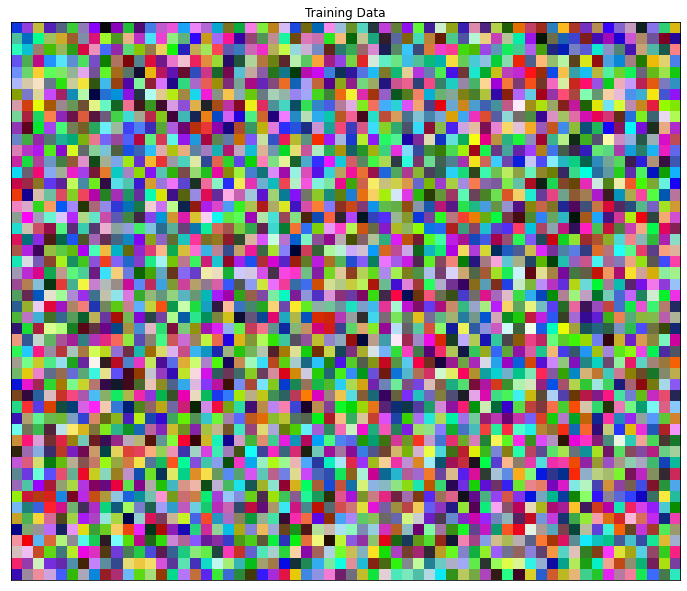

In [5]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 12), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(train_data.reshape(50, 60, 3))
ax.title.set_text('Training Data')

First ten data points

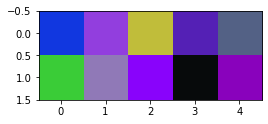

In [6]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
ax.imshow(train_data[0:10].reshape(2,5,3))

## Self Organizing Map

We use a SOM to cluster the dataset. The SOM will have $5\times 5=25$ cells. Each cell will be a 3 dimensional tuple. Cells will start with random numbers uniformly distributed in the interval $[0,255]$.

In [19]:
from som.somBasic import somClass
smm = somClass()

In [20]:
# Dimensions
nrows = 10np.random.rand(nrows, ncols, dimensions)*255
ncols = 10
dimensions = 3

In [13]:
SOM = np.random.rand(nrows, ncols, dimensions)*255
SOM[0,0]

array([114.38103308,   2.72935106, 252.02777986])

The figure shows two random initializations of the untrained SOM.

[]

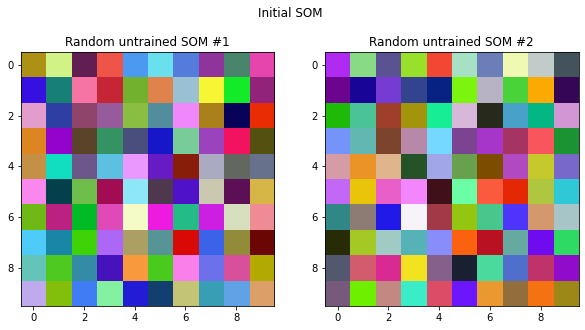

In [14]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
SOM = np.random.rand(nrows, ncols, dimensions)*255
ax[0].imshow(SOM.astype('int'))
ax[0].set_title('Random untrained SOM #1')
SOM = np.random.rand(nrows, ncols, dimensions)*255
ax[1].imshow(SOM.astype('int'))
ax[1].set_title('Random untrained SOM #2')
f.suptitle('Initial SOM')
plt.plot()

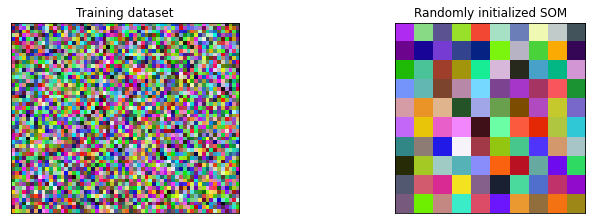

In [15]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training dataset')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly initialized SOM')


In [16]:
def find_BMU(SOM, 
             x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)


def update_weights(SOM, 
                   train_ex, 
                   learn_rate, 
                   radius_sq,
                   BMU_coord, 
                   step=3):
    g, h = BMU_coord

    if radius_sq < 1e-3:
        SOM[g, h, :] += learn_rate * (train_ex - SOM[g, h, :])
        return SOM

    for i in range(max(0, g - step), min(SOM.shape[0], g + step)):
        for j in range(max(0, h - step), min(SOM.shape[1], h + step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i, j, :] += learn_rate * dist_func * (train_ex - SOM[i, j, :])
    return SOM


def train_SOM(SOM, 
              train_data, 
              learn_rate = .1, 
              radius_sq = 1,
              lr_decay = .1, 
              radius_decay = .1, 
              epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        np.random.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

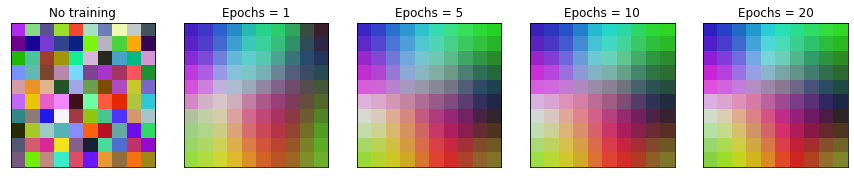

In [17]:
fig, ax = plt.subplots(
    nrows=1, ncols=5, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[])
)
ax[0].imshow(SOM.astype(int))
ax[0].title.set_text('No training')
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(1,5)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

## Number of neurons in the SOM

We try using different numbers of neurons

